# 1. K-NN classifier

**Question** How does the k-NN algorithm work?

**Question** What are the parameters we need to choose to classify with k-NN? How can we choose them

**Question** What are the advantages and disadvantages of this algorithm? For which kind of dataset it would be appropriate and for which datasets it wouldn't?

**Question** How can we deal with nominal values in distance measurement?


In further part of the laboratory, we will perform a preprocessing of the data and a classification of a set of biomedical voice measurements. Some of them has been recorded for people with Parkinson's desease.

More about the dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

First, we load the required packages:

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 2. Data loading and analysis of the attributes
Let's start with the data preparation, 
#### 2.1. Load the dataset from file parkinsons.csv into data frame using library pandas (pd.read_csv). Write the body of the read_data function to return a data frame with attributes and a list with class labels. Classes are available in 'status' column. You should also remove column 'name' from the data (see function drop of dataFrame https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [8]:
import pandas as pd

def read_data(path):

    data = pd.read_csv(path)
    
    data.drop(columns=['name'], inplace=True)
    
    data_X = data.drop(columns=['status']) 
    data_Y = data['status']  
    
    return data_X, data_Y

data_X, data_Y = read_data("parkinsons.data")

Let's see what we have loaded.

In [9]:
data_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
data_Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

#### 1.2. Let's analyse the given data. 
* How many attributes are in given data?
* Are the attributes on the common scale?
* Are observations equally distributed for sick and healthy people?

Plot the histogram of the assigned class and analyse the distribution.


Ilość atrybutów: 22
Skala atrybutow: Różna
Rozkład obserwacji:
status
1    0.753846
0    0.246154
Name: proportion, dtype: float64


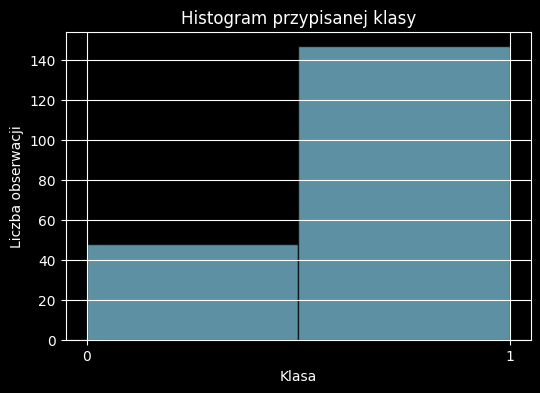

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def read_data(path):
    
    data = pd.read_csv(path)
    data.drop(columns=['name'], inplace=True)
    data_X = data.drop(columns=['status'])
    data_Y = data['status']
    return data_X, data_Y

def analyze_data(data_X, data_Y):

    num_attributes = len(data_X.columns)
    print("Ilość atrybutów:", num_attributes)
    

    attributes_scale = "Wspólna" if (data_X.min().min() >= 0 and data_X.max().max() <= 1) else "Różna"
    print("Skala atrybutow:", attributes_scale)
    

    observations_distribution = data_Y.value_counts(normalize=True)
    print("Rozkład obserwacji:")
    print(observations_distribution)
    
    plt.figure(figsize=(6, 4))
    plt.hist(data_Y, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Klasa')
    plt.ylabel('Liczba obserwacji')
    plt.title('Histogram przypisanej klasy')
    plt.xticks([0, 1])
    plt.grid(True)
    plt.show()


data_X, data_Y = read_data("parkinsons.data")

analyze_data(data_X, data_Y)


Plot the histograms of the first 5 attributes. 

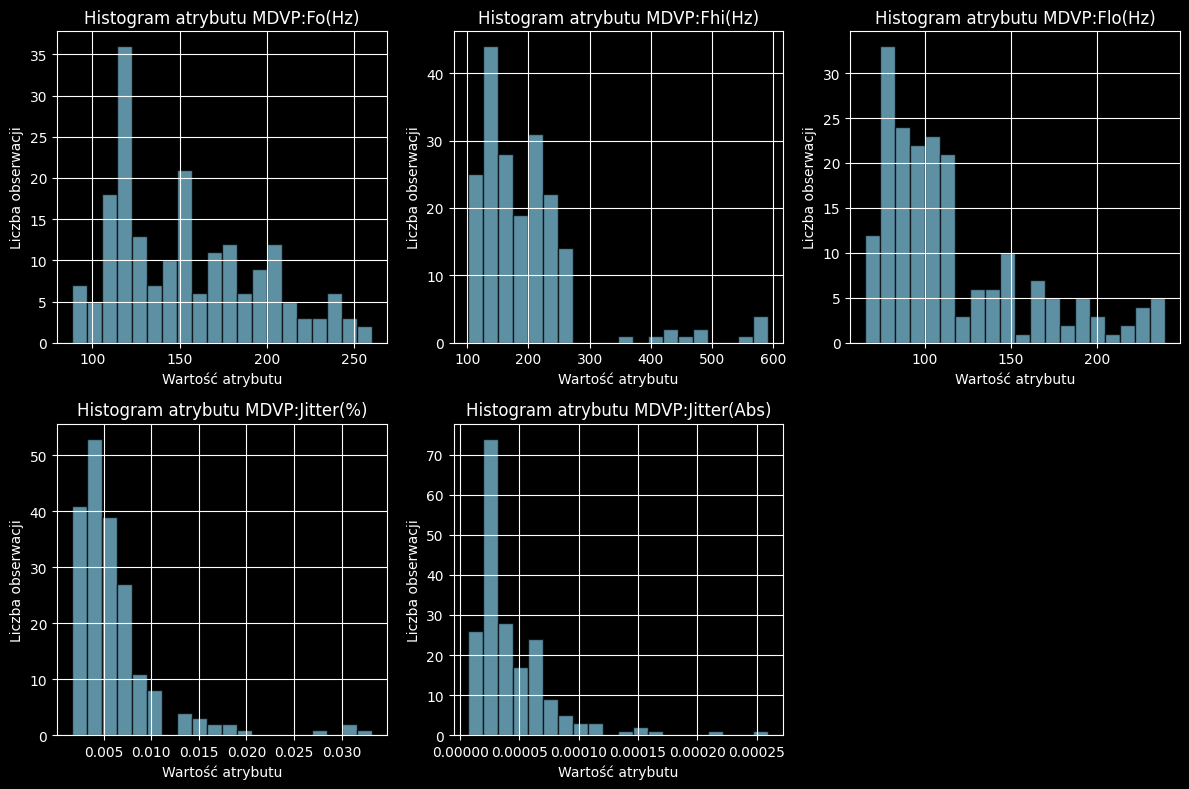

In [21]:
def plot_attribute_histograms(data_X):
    # Wybierz pierwsze pięć atrybutów
    first_5_attributes = data_X.iloc[:, :5]

    # Narysuj histogramy dla każdego z pierwszych pięciu atrybutów
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(first_5_attributes.columns):
        plt.subplot(2, 3, i + 1)
        plt.hist(first_5_attributes[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        plt.xlabel('Wartość atrybutu')
        plt.ylabel('Liczba obserwacji')
        plt.title(f'Histogram atrybutu {column}')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Narysuj histogramy pierwszych pięciu atrybutów
plot_attribute_histograms(data_X)


import pandas as pd
import matplotlib.pyplot as plt

# data = pd.read_csv("parkinsons.data")

# attributes_subset = data.iloc[:, :5]

# for column in attributes_subset.columns:
#     plt.hist(attributes_subset[column], bins=20)
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.title('Histogram of {}'.format(column))
#     plt.show()

# 3. Train and test set selection

#### We want to build our classifier and test it on another set of observations.

To split data into train and test sets use train_test_split method from sklearn.model_selection module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use 80% of cases in train set and 20% in test set. 
Use random_state = 5 just to be sure we all have the same rows in train and test sets :)

split_data should return a tuple containing: dataframe with train set attributes, list of labels for train data, dataframe with test set attributes and a list of labels for test data.

In [15]:
from sklearn.model_selection import train_test_split

def split_data(data_X, data_Y, test_percent=20, random_state=5):

    train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=test_percent/100, random_state=random_state)
    return train_X, train_Y, test_X, test_Y

train_X, train_Y, test_X, test_Y = split_data(data_X, data_Y)

print("rows in train set:", train_X.shape[0])
print("rows in test set:", test_X.shape[0])


rows in train set: 156
rows in test set: 39


# 4. Data standarization/normalization
#### 4.1. Use k-NN algorithm to classify the obtained test set using k=3. What is the accuracy of the classification?

Use KNeighborsClassifier class from sklearn.neighbors module. Useful methods: fit and predict. Classification accuracy can be obtained with accuracy_score method from sklearn.metrics. Function get_classification_accuracy should return the accuracy of classification of given test set on model build with train set.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k=3):
    # Utwórz instancję klasyfikatora k-NN
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Dopasuj model do zestawu treningowego
    knn_classifier.fit(train_data_X, train_data_Y)
    
    # Dokonaj predykcji na zestawie testowym
    predictions = knn_classifier.predict(test_data_X)
    
    # Oblicz dokładność klasyfikacji
    accuracy = accuracy_score(test_data_Y, predictions)
    
    return accuracy

# Użyj funkcji get_classification_accuracy do obliczenia dokładności klasyfikacji
classification_accuracy = get_classification_accuracy(train_X, train_Y, test_X, test_Y)
print("Dokładność klasyfikacji:", classification_accuracy)


Dokładność klasyfikacji: 0.7692307692307693


#### 4.2. Perform some normalization or standarization of attributes. Then repeat the classification. Do the classification accuracy change?

You can use sklearn.preprocessing.StandardScaler, sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.MaxAbsScaler and their fit_transform/transform methods.

Try other standarization methods to verify the standarization procedure influence the classification accuracy.
standarize_train_and_test should return 2 dataFrames - with normalized train and normalized test sets.

In [17]:
from sklearn.preprocessing import StandardScaler

def standarize_train_and_test(train_X, test_X):

    scaler = StandardScaler()

    norm_train_X = scaler.fit_transform(train_X)
    
    # Przekształcenie danych testowych na podstawie standaryzacji, którą zastosowaliśmy do danych treningowych
    norm_test_X = scaler.transform(test_X)
    
    return norm_train_X, norm_test_X

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X)

# Użyj funkcji get_classification_accuracy do ponownego obliczenia dokładności klasyfikacji na zstandaryzowanych danych
classification_accuracy_after_standarization = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y)
print("Dokładność klasyfikacji po standaryzacji:", classification_accuracy_after_standarization)


Dokładność klasyfikacji po standaryzacji: 0.9743589743589743


# 5. Choosing k value
Using train set with normalization/standarization obtained in the previous exercices run k-NN algoritm using k from 1 to 20. Use 5-fold cross-validation within the train set to obtain the classification accuracy. Plot the obtained accuracy of the classification. Which k value seems to be the best for the given dataset?

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for more info about cross validation in sklearn.

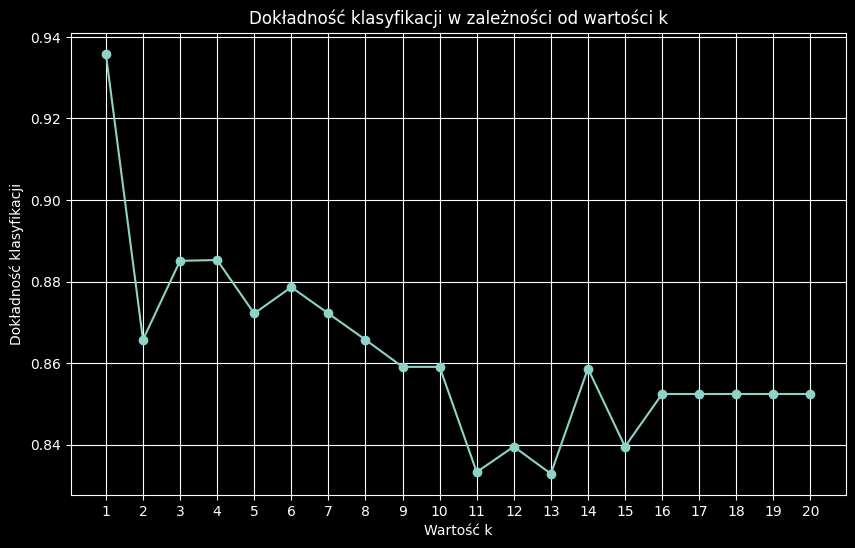

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

def get_accuracy_for_k_values(train_X, train_Y, max_k=20):
    accuracies = []

    scaler = StandardScaler()
    norm_train_X = scaler.fit_transform(train_X)

    for k in range(1, max_k+1):

        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        cv_results = cross_validate(knn_classifier, norm_train_X, train_Y, cv=5, scoring='accuracy')

        mean_accuracy = np.mean(cv_results['test_score'])
        accuracies.append(mean_accuracy)
        
    return accuracies

max_k = 20
accuracies = get_accuracy_for_k_values(train_X, train_Y, max_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k+1), accuracies, marker='o', linestyle='-')
plt.title('Dokładność klasyfikacji w zależności od wartości k')
plt.xlabel('Wartość k')
plt.ylabel('Dokładność klasyfikacji')
plt.xticks(np.arange(1, max_k+1, 1))
plt.grid(True)
plt.show()


# 6. Testing classifier
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [19]:
best_k = np.argmax(accuracies) + 1

knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(norm_train_X, train_Y)

# Przetestuj klasyfikator na zestawie testowym i oblicz dokładność klasyfikacji
final_classification_accuracy = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k=best_k)
print("Ostateczna dokładność klasyfikacji na zestawie testowym:", final_classification_accuracy)


Ostateczna dokładność klasyfikacji na zestawie testowym: 0.9743589743589743


# 7. Homework
Finish all the above tasks in this notebook that you have not finished during class.

You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value.

Write a short **report** (may be in this notebook as a separate section below) containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification was used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.   
    

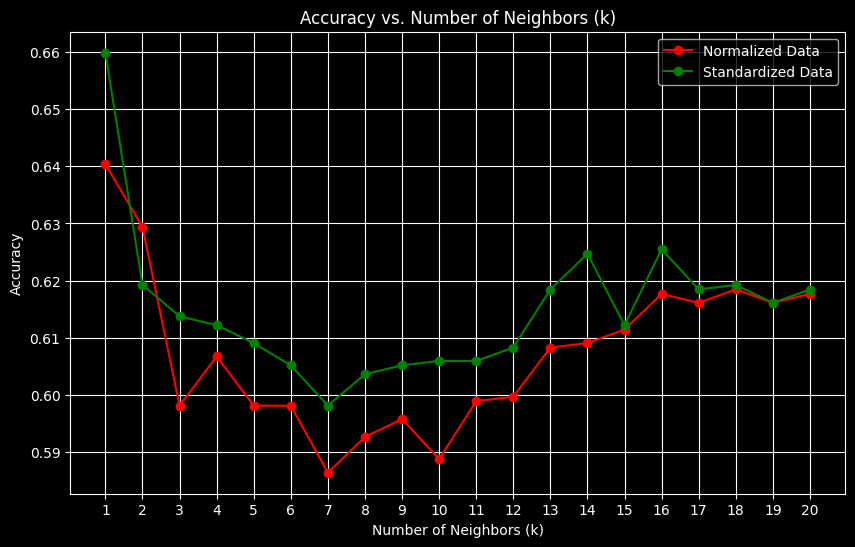

Best k (Normalized Data): 1
Best k (Standardized Data): 1
Classification Accuracy (Normalized Data): 0.6875
Classification Accuracy (Standardized Data): 0.684375


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

data = pd.read_csv("winequality-red.csv")

quality_mapping = {"poor": 0, "medium": 1, "good": 2}
data['quality'] = data['quality'].map(quality_mapping)

X = data.drop('quality', axis=1)
y = data['quality']


scaler = MinMaxScaler() 
X_normalized = scaler.fit_transform(X)

scaler = StandardScaler()  
X_standardized = scaler.fit_transform(X)


X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)
X_train_std, X_test_std, _, _ = train_test_split(X_standardized, y, test_size=0.2, random_state=42, stratify=y)


k_values = range(1, 21)
accuracy_scores_norm = []
accuracy_scores_std = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores_norm = cross_val_score(knn, X_train_norm, y_train, cv=5)
    accuracy_scores_norm.append(scores_norm.mean())

    knn = KNeighborsClassifier(n_neighbors=k)
    scores_std = cross_val_score(knn, X_train_std, y_train, cv=5)
    accuracy_scores_std.append(scores_std.mean())


plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
plt.plot(k_values, accuracy_scores_norm, color='red', linestyle='-', marker='o', label='Normalized Data')
plt.plot(k_values, accuracy_scores_std, color='green', linestyle='-', marker='o', label='Standardized Data')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()


best_k_norm = k_values[np.argmax(accuracy_scores_norm)]
best_k_std = k_values[np.argmax(accuracy_scores_std)]
print("Best k (Normalized Data):", best_k_norm)
print("Best k (Standardized Data):", best_k_std)


knn_norm = KNeighborsClassifier(n_neighbors=best_k_norm)
knn_std = KNeighborsClassifier(n_neighbors=best_k_std)

knn_norm.fit(X_train_norm, y_train)
knn_std.fit(X_train_std, y_train)

accuracy_norm = knn_norm.score(X_test_norm, y_test)
accuracy_std = knn_std.score(X_test_std, y_test)

print("Classification Accuracy (Normalized Data):", accuracy_norm)
print("Classification Accuracy (Standardized Data):", accuracy_std)


Raport:

Zastosowano skalowanie min-max do znormalizowania zbioru danych oraz standaryzację Z-score do standaryzacji zbioru danych. Zastosowano klasyczny podzial na czesc treningowa i testowa (80% dla treningu, 20% dla testowania). Wykorzystano stratyfikację podziału. Wykres pokazuje dokładność klasyfikatora k-NN dla różnych wartości k. Zawiera on dwie linie reprezentujące dokładność danych znormalizowanych i standaryzowanych. Na podstawie powyzszych pomiarow możemy zauważyć, jak metody wstępnej obróbki i wybór k wpływają na dokładność klasyfikacji algorytmu k-NN.